In [22]:
import numpy as np
import pandas as pd
from sklearn import tree

In [23]:
df = pd.read_csv("datasets/Buy_computer.csv")
df = df.drop(columns=["id"])
df

,age,income,student,credit_rating,Buy_Computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_age,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_age,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [24]:
map_age = {
    "youth":0,
    "middle_age":1,
    "senior":2
}

map_income = {
    "low":0,
    "medium":1,
    "high":2
}

map_student = {
    "no":0,
    "yes":1
}   

map_credit_rate = {
    "fair":0,
    "excellent":1
}

map_label = {
    "no":0,
    "yes":1
}

df["age"] = df["age"].map(map_age)
df["income"] = df["income"].map(map_income)
df["student"] = df["student"].map(map_student)
df["credit_rating"] = df["credit_rating"].map(map_credit_rate)
df["Buy_Computer"] = df["Buy_Computer"].map(map_label)


In [25]:
data = df.to_numpy()
X = data[:, :-1]
Y = data[:, -1]

In [31]:
clf_tree = tree.DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.1)
clf_tree.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.1)

[Text(0.6, 0.8333333333333334, 'student <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = yes'),
 Text(0.4, 0.5, 'age <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = no'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = no'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = yes'),
 Text(0.8, 0.5, 'entropy = 0.592\nsamples = 7\nvalue = [1, 6]\nclass = yes')]

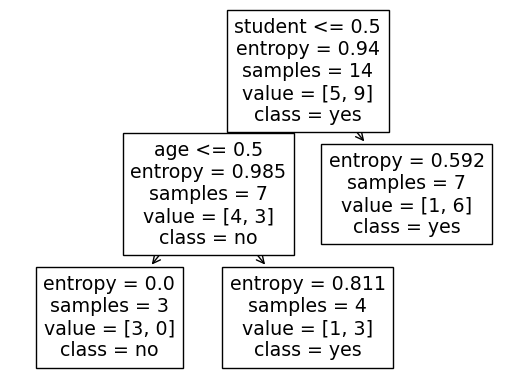

In [32]:
tree.plot_tree(clf_tree, feature_names=df.columns, class_names=["no", "yes"])

In [33]:
X_test = [[1, 1, 1, 0], [2, 2, 0, 1], [0, 0, 0, 1]]
clf_tree.predict(X_test)

array([1, 1, 0], dtype=int64)